<!-- vscode-jupyter-toc -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
<a id='toc0_'></a>**Table of contents**    
- [Gradient Descent from scratch](#toc1_1_)    
- [GD in Linear Regression](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- /vscode-jupyter-toc -->

## <a id='toc1_1_'></a>[Gradient Descent from scratch](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple

plt.style.use('seaborn')

$f(x) = (x-5)^2$

In [2]:
X = np.arange(10)
Y = (X-5)**2 # a certain function that we want to minimize

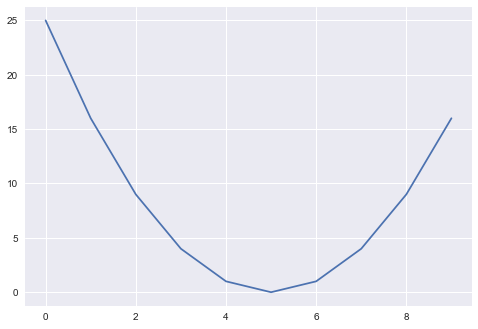

In [3]:
plt.plot(X, Y)
plt.show()

Gradient of $f(x)$:
$\nabla (x, y) = 2(x-5)$

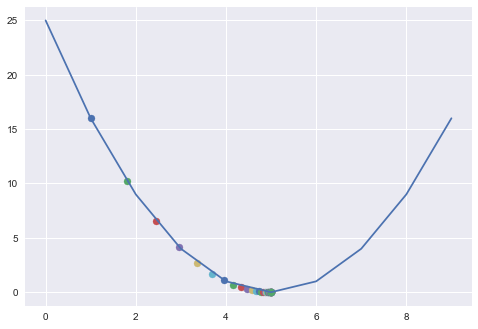

In [4]:
x = 0 # start
lr = 0.1 # learning rate
steps = 50 # number of iterations
errors = []

plt.plot(X, Y)

for _ in range(steps):
    grad = 2*(x-5) # gradient of the function Y
    x -= lr * grad # new X
    y = (x-5)**2 # y with nex X
    errors.append(y)
    plt.scatter(x, y)

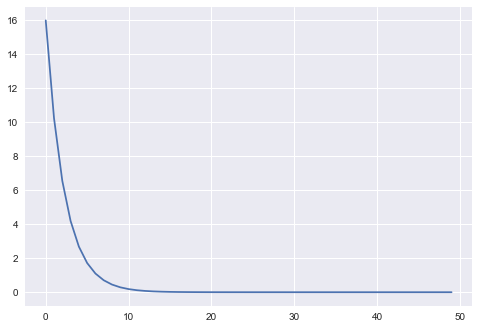

In [5]:
plt.plot(errors)

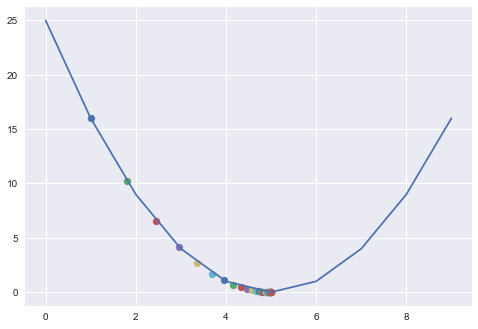

In [6]:
def gd(X, Y, gradient, orig_func, x: int, learn_rate=0.1, n_iter=50, tolerance=1e-05):
    """ 
    X: array of x-values
    Y: array of y-values
    orig_func: f(x)
    gradient: gradient of (X, Y)    
    """
    plt.plot(X, Y)

    for _ in range(n_iter):
        x -= learn_rate * gradient(x)
        y = orig_func(x)
        
        if y <= tolerance:
            break
        
        plt.scatter(x, y)

gd(X, Y, gradient=lambda x: 2*(x-5), x=0, orig_func=lambda x:(x-5)**2)

## <a id='toc2_1_'></a>[GD in Linear Regression](#toc0_)

$$ \hat{y} = m + bx $$

$$ MSE = \frac{1}{n} \sum_{1}^{n}{y_{i} - \hat{y}_{i}} = \frac{1}{n} \sum_{1}^{n}{y_{i} - (m + bx)}$$


Let's take partial derivatives with respect to $m$ and $b$. To derive a complex function we need to use Chain rule: $ F'(x) = f'(g(x)) * g'(x) $

$$ \frac{\partial f}{\partial m} = -2x \cdot g(x) = \frac{1}{n} \sum_{1}^{n} -2x_{i} \cdot (y_{i} - (mx_{i} + b))$$

$$ \frac{\partial f}{\partial b} = -2 \cdot g(x) = \frac{1}{n} \sum_{1}^{n} 2 \cdot (y_{i} - (mx_{i} + b))$$

Here are helper functions

In [7]:
def MSE(y, y_pred):
    """ Mean Sqaured Error """
    return sum((y - y_pred) ** 2) / len(y)

def gradient_descent(X, y, lr=0.05, epoch=10) -> Tuple[int, int, list, list]:
    """ GD for Linear Regression """
    m, b = 0.2, 0.2 # parameters
    params_history, mse_history = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        params_history.append((m, b))
        mse_history.append(MSE(y, (m*X + b)))        
    
    return m, b, params_history, mse_history

### Loading of data

In [8]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

features = pd.DataFrame(data.data, columns=data.feature_names).astype(np.float16)
target = pd.DataFrame(data.target, columns=['Target']).astype(np.float16)

In [9]:
df = features.join(target) 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.328125,41.0,6.984375,1.023438,322.0,2.554688,37.87500,-122.25,4.527344
1,8.304688,21.0,6.238281,0.971680,2400.0,2.109375,37.87500,-122.25,3.585938
2,7.257812,52.0,8.289062,1.073242,496.0,2.802734,37.84375,-122.25,3.521484
3,5.644531,52.0,5.816406,1.073242,558.0,2.548828,37.84375,-122.25,3.412109
4,3.845703,52.0,6.281250,1.081055,565.0,2.181641,37.84375,-122.25,3.421875


In [10]:
df.describe().round(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,inf,inf,inf,1.1,inf,3.1,inf,-inf,2.1
std,1.9,12.6,2.5,0.5,inf,inf,2.1,2.0,1.2
min,0.5,1.0,0.8,0.3,3.0,0.7,32.5,-124.4,0.2
25%,2.6,18.0,4.4,1.0,787.0,2.4,33.9,-121.8,1.2
50%,3.5,29.0,5.2,1.0,1166.0,2.8,34.2,-118.5,1.8
75%,4.7,37.0,6.1,1.1,1725.0,3.3,37.7,-118.0,2.6
max,15.0,52.0,141.9,34.1,35680.0,1243.0,41.9,-114.3,5.0


Removing outliers

In [11]:
df = df[df.Target < 3.5]
df = df[df.MedInc < 8]

feature, target = df['MedInc'], df['Target']

In [12]:
df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
mean,3.482422,1.722656
std,1.365234,0.750000
min,0.500000,0.150024
25%,2.451660,1.119141
50%,3.302734,1.634766
75%,4.346680,2.255859
max,7.988281,3.498047


In [13]:
X = df.MedInc
y = df.Target

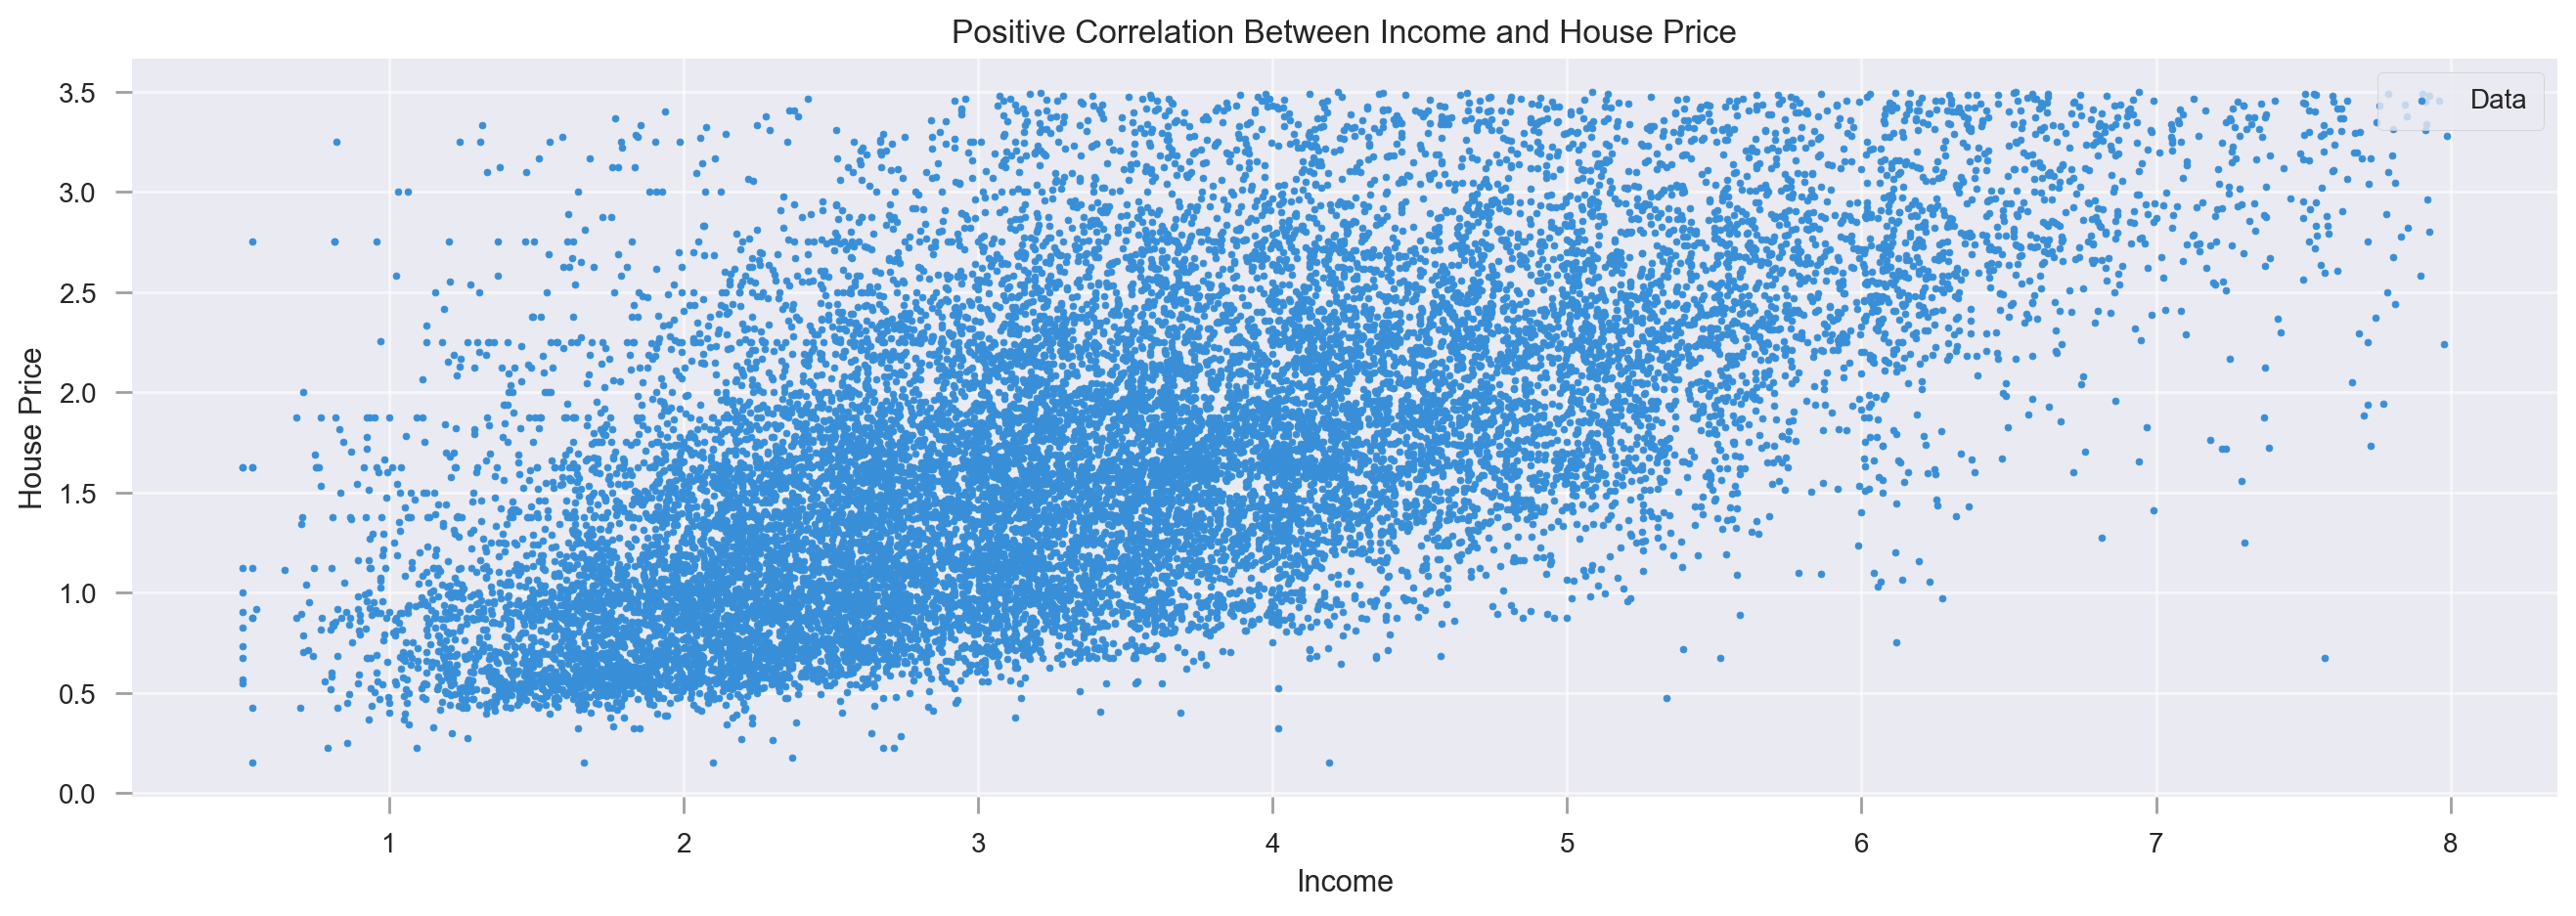

In [14]:
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(16,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Positive Correlation Between Income and House Price')
plt.xlabel('Income',)
plt.ylabel('House Price',)
plt.legend(frameon=True, loc=1, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

In [15]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(14,5))
    plt.rcParams['figure.dpi'] = 200
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title)
    plt.xlabel('Income')
    plt.ylabel('Price')
    plt.legend(frameon=True, loc=1, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

In [16]:
m, b, log, mse = gradient_descent(X, y, lr=0.01, epoch=100)

y_pred = m * X + b

print("MSE:", MSE(y, y_pred))
plot_regression(X, y, y_pred, log=log, title="Linear Regression with Gradient Descent")

plt.figure(figsize=(14,3))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

MSE: 0.3493125174725809


Reference: https://github.com/arseniyturin/SGD-From-Scratch/blob/master/Gradient%20Descent.ipynb